## Flux Scanning based on Objective Flux to identify gene targets for up/down regulation

When genes are important for the health and growth of cells it can be beneficial to down- or up regulate them instead of knocking out. With the Flux variability scanning based on enforced objective flux (FVSEOF) method, genes or reactions are identified which can be over- or downregulated in order to achieve our objective: optimal production of THCA. The main objective is set to growth, as without growth the organisms wouldn't be able to live for long.

Targets for gene up/down regulation are identified with algorithms from Cameo that simulate and optimize over or downregulation of genes. 


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from pytest import approx
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

%run model.ipynb

'' is not a valid SBML 'SId'.


The fluxes are calculated and plotted for multiplications of the THCAS flux (the last step in the THCA biosynthesis pathway) with factors 1 to 10.

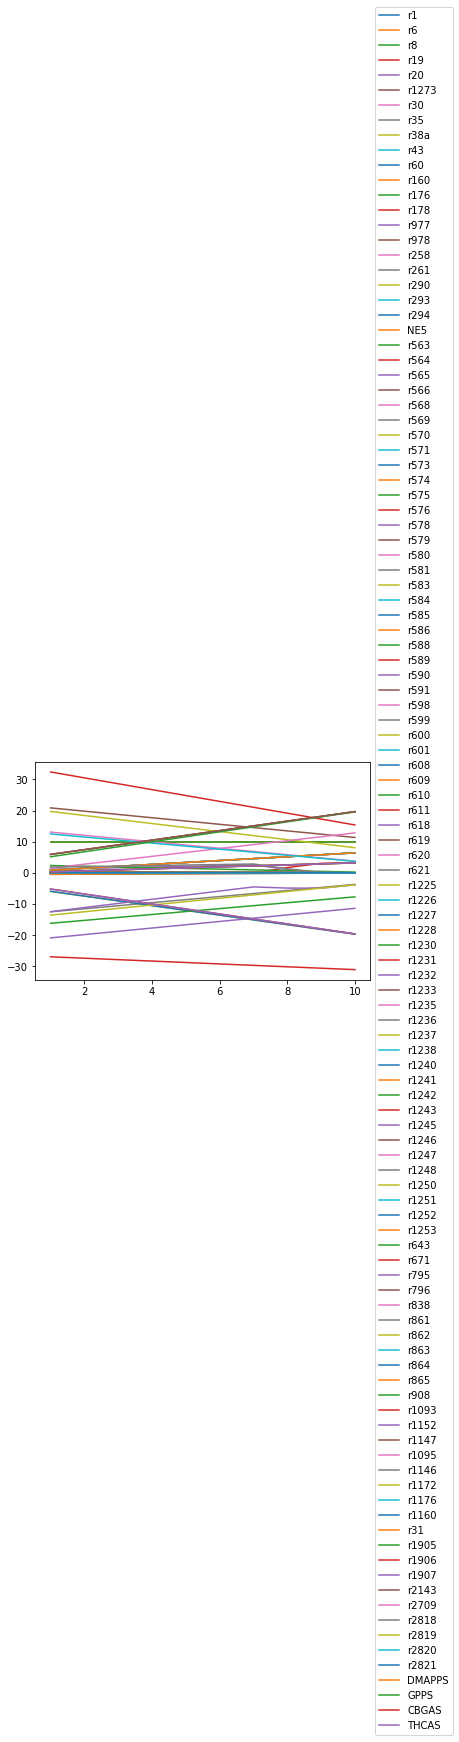

In [2]:
model.objective = {model.reactions.DRAIN_Biomass: 1}
fseof = FSEOF(model)
result= fseof.run(target=model.reactions.THCAS)
df = result.data_frame

result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The values are sorted and are removed when no change in flux is observed (flux change = 0.0).

In [3]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
remove = (df != approx(0.0)).all(axis=1)
df = df.loc[remove]

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

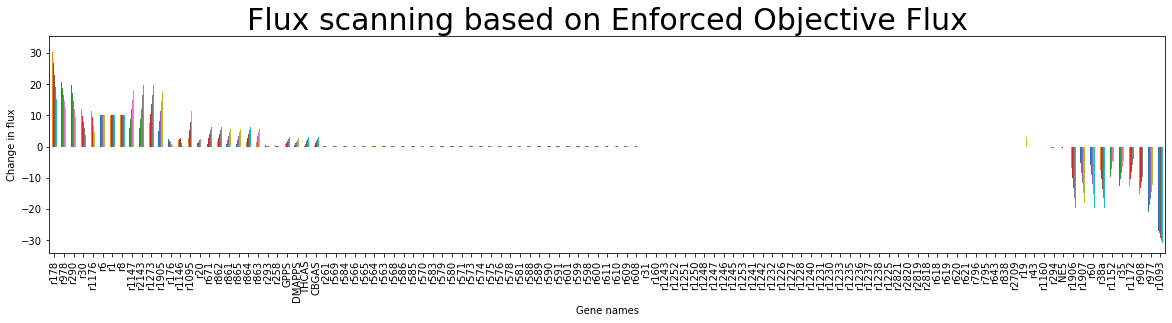

In [4]:
fig = df.plot(legend=None, kind='bar',figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

Fluxes with a higher relative change than 70% when THC production is multiplied by factor 10 are subtracted and shown in a plot. The relative flux change is calculated with: (end-start)/end + 1.

These reactions are interesting to target, while inducing respectively inhibiting these genes have a great potential to increase THCA production. 

In [5]:
df['rel_flux_change'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['rel_flux_change'] > 1.7]
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,rel_flux_change
r1905,5.172565,6.771947,8.371328,9.970709,11.570091,13.169472,14.768853,16.368235,17.967616,19.566997,1.735649
r1095,1.536159,2.791534,4.046909,5.302283,6.557658,7.813033,9.068407,10.323782,11.579157,12.834531,1.880310
r671,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r862,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r861,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r865,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r864,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
r863,0.866626,1.484567,2.102508,2.720449,3.338390,3.956331,4.574272,5.192213,5.810154,6.428095,1.865182
GPPS,0.395596,0.708297,1.020997,1.333698,1.646399,1.959100,2.271800,2.584501,2.897202,3.209903,1.876758
DMAPPS,0.395596,0.708297,1.020997,1.333698,1.646399,1.959100,2.271800,2.584501,2.897202,3.209903,1.876758


In [6]:
df = target_reactions_df.drop(labels='rel_flux_change', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 70%')

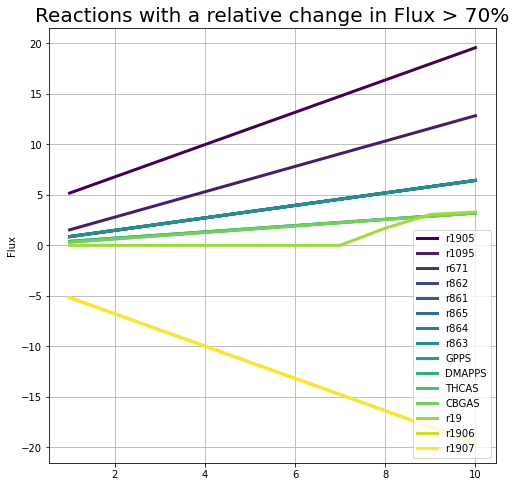

In [7]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 70%', size=20)

#### Possible gene targets

In [61]:
print(str(model.reactions.r861)  +'     (' +str(model.reactions.r861.name) + ')')
print(str(model.reactions.r862)  +'     (' +str(model.reactions.r862.name) + ')')
print(str(model.reactions.r863)  +'     (' +str(model.reactions.r863.name) + ')')
print(str(model.reactions.r864)  +'     (' +str(model.reactions.r864.name) + ')')
print(str(model.reactions.r865)  +'     (' +str(model.reactions.r865.name) + ')')
print(str(model.reactions.r1095) +'     (' +str(model.reactions.r1095.name) + ')')
print(str(model.reactions.r1905) +'     (' +str(model.reactions.r1905.name) + ')')
print(str(model.reactions.r1906) +'     (' +str(model.reactions.r1906.name) + ')')
print(str(model.reactions.r1907) +'     (' +str(model.reactions.r1907.name) + ')')
print(str(model.reactions.r19)   +'     (' +str(model.reactions.r19.name) + ')')

r861: AACCOA + ACCOA + H2O <=> COA + H3MCOA     (3-hydroxy-3-methylglutaryl coenzyme A synthase)
r862: H3MCOA + 2.0 NADPH <=> COA + MVL + 2.0 NADP     (3-hydroxy-3-methylglutaryl-coenzyme A (HMG-CoA) reductase isozyme)
r863: ATP + MVL --> ADP + PMVL     (Mevalonate kinase)
r864: ATP + PMVL --> ADP + PPMVL     (Phosphomevalonate kinase)
r865: ATP + PPMVL --> ADP + CO2 + IPPP + PI     (Diphosphomevalonate decarboxylase)
r1095: PIe <=> PI     ()
r1905: ACCOAm + CARm <=> ACCARm + COAm     (Carnitine O-acetyltransferase)
r1906: ACCOA + CAR <=> ACCAR + COA     (Carnitine O-acetyltransferase)
r1907: ACCAR + CARm <=> ACCARm + CAR     (Carnitine transport reaction)
r19: ATP + CO2 + H2O + PYR --> ADP + OA + PI     (Pyruvate carboxylase)


The genes r861 - r865 code for enzymes taking part in the mevalonate pathway. While the mevalonate pathway precedes the biosynthetic pathway of THCA, increasing of these fluxes are a logical cause for a higher flux of THCAS. The same holds for the enzymes taking part of the biosynthetic pathway of THCA: GPPS, DMAPPS and CBGAS. 

r1095 shows the highest flux increase and represents the uptake reaction of pyruvate by the cells. Pyruvate is a precursor for a lot of processes in the cell and also to make acetyl-CoA, which is the precursor for the mevalonate pathway, followed by the THCA biosynthesis. 

Acetyl CoA C-acetyltransferase (r671) shows a significant flux increase, generating more acetyl CoA from acetyl coenzyme A. 

r1905 and r1906 are responsible for the reversible conversion of Acetyl CoA and carnitine in Acetyl-carnitine and CoA in the mitochondria, respectively the cytosol.
Acetyl-CoA is the precursor for the mevalonate pathway and therefore desired in high amounts in the cytosol. Induction of the conversion of acetyl CoA in the cytosol ((-)r1906) is stimulated by induction of transport carnitine to the cytosol ((-) r1907) and increasing of the flux which which breaks down carnitine in the mitochondria ((+)r1905)

Only when the flux of THCAS is multiplied with 8 or more, pyruvate decarboxylase (r19) obtains flux. This means less pyruvate is available for obtaining acetyl-CoA. A possible explanation for this observation is that this reaction is necessary to replenish the citric acid cycle metabolites to allow sufficient aerobic fermentation to generate ATP.


## References
***
KEGG PATHWAY: Terpenoid Backbone Biosynthesis - Aspergillus niger (black aspergilli). (n.d.). https://www.kegg.jp/pathway/map=ang00900&keyword=Mevalonate

KEGG PATHWAY: Biosynthesis of secondary metabolites - Aspergillus niger (black aspergilli). (n.d.). https://www.kegg.jp/pathway/ec01110+5.4.99.7

KEGG PATHWAY: Metabolic pathways - Aspergillus niger (black aspergilli). (n.d.). https://www.kegg.jp/pathway/ec01100+5.4.99.7

KEGG PATHWAY: Steroid biosynthesis - Aspergillus niger (black aspergilli). (n.d.). https://www.kegg.jp/pathway/ec00100+5.4.99.7
